# Introduction to Visualization with ggplot2

R has several systems for making graphs, but ggplot2 is one of the most elegant and most versatile. `ggplot2` implements the grammar of graphics, a coherent system for describing and building graphs. With `ggplot2`, you can do more faster by learning one system and applying it in many places.

gg stands for `grammar of graphics`

Supplemental resource:
1. https://www.youtube.com/watch?v=FdVy57oGJuc
2. https://ggplot2.tidyverse.org/articles/ggplot2.html
3. https://posit.co/wp-content/uploads/2022/10/data-visualization-1.pdf

In [ ]:
library(dplyr)
library(tidyverse)

In [ ]:
#-- ggplot2 is loaded in as part of the Tidyverse, but you can
#-- also load it in directly
library("ggplot2")

To start with, let's use the cars dataset to work on some visuals with ggplot2

In [ ]:
mpg <- ggplot2::mpg
head(mpg, 5)

## 1. Intro to ggplot2 using a Scatter Plot

Do cars with big engines use more fuel than cars with small engines?

In [ ]:
ggplot(data = mpg, aes(x = displ, y = hwy)) +
  geom_point()

### Core Components of a ggplot
1. `data`: The data you are using
2. `aesthetic mapping (aes)`: maps data to important parts of a graph
3. `Geometry (geom)`: geometry of the plot, dictates what type of graph it is e.g. scatter, line bar etc.
4. `coordinates`: Which part of the data are we showing
5. `theme`: formatting, font, color, grid style etc

### The Basics

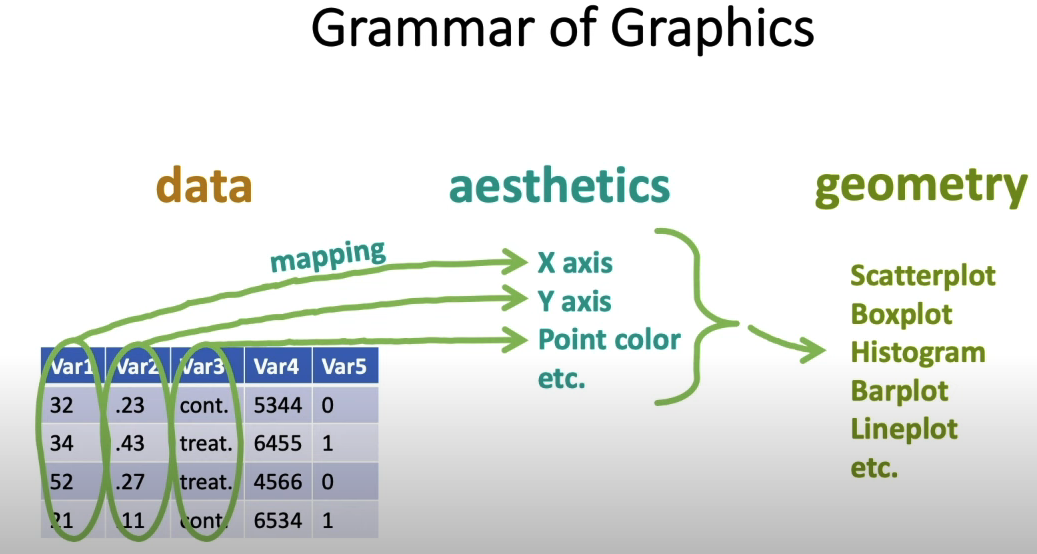

### The Basics + the options

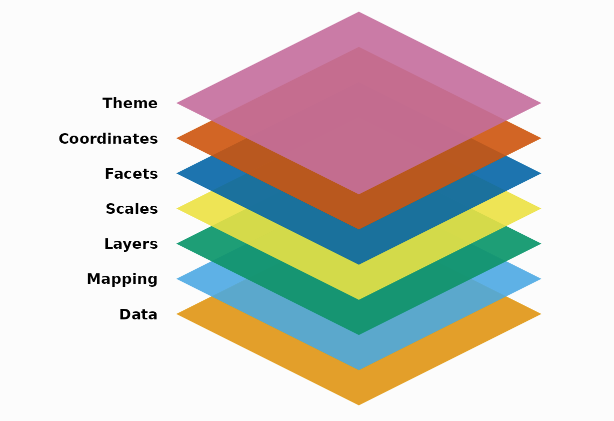

With ggplot2, you begin a plot with the function `ggplot()`. `ggplot()` creates a coordinate system that you can add layers to. The first argument of `ggplot()` is the dataset to use in the graph. So `ggplot(data = mpg)` creates an empty graph, but it’s not very interesting so I’m not going to show it here.

You complete your graph by adding one or more layers to `ggplot()`. The function `geom_point()` adds a layer of points to your plot, which creates a scatterplot. `ggplot2` comes with many `geom` functions that each add a different type of layer to a plot. You’ll learn a whole bunch of them throughout this chapter.

Each geom function in `ggplot2` takes a mapping argument. This defines how variables in your dataset are mapped to visual properties. The mapping argument is always paired with `aes()`, and the x and y arguments of `aes()` specify which variables to map to the x and y axes. `ggplot2` looks for the mapped variables in the data argument, in this case, mpg.

Let’s turn this code into a reusable template for making graphs with ggplot2. To make a graph, replace the bracketed sections in the code below with a dataset, a geom function, or a collection of mappings.

```
ggplot(data = <DATA>) +
  <GEOM_FUNCTION>(mapping = aes(<MAPPINGS>))
```
The rest of this chapter will show you how to complete and extend this template to make different types of graphs. We will begin with the <MAPPINGS> component.

In [ ]:
#-- Lets add another dimension to the graph for class of car
ggplot(data = mpg, aes(x = displ, y = hwy)) +
  geom_point(mapping =  aes(color = class))

## Bar Chart

In [ ]:
head(ggplot2::diamonds, 3)

In [ ]:
ggplot(data = diamonds) +
  geom_bar(mapping = aes(x = cut))

On the x-axis, the chart displays cut, a variable from diamonds. On the y-axis, it displays count, but count is not a variable in diamonds! Where does count come from? Many graphs, like scatterplots, plot the raw values of your dataset. Other graphs, like bar charts, calculate new values to plot:

bar charts, histograms, and frequency polygons bin your data and then plot bin counts, the number of points that fall in each bin.

smoothers fit a model to your data and then plot predictions from the model.

boxplots compute a robust summary of the distribution and then display a specially formatted box.

The algorithm used to calculate new values for a graph is called a stat, short for statistical transformation. The figure below describes how this process works with geom_bar()

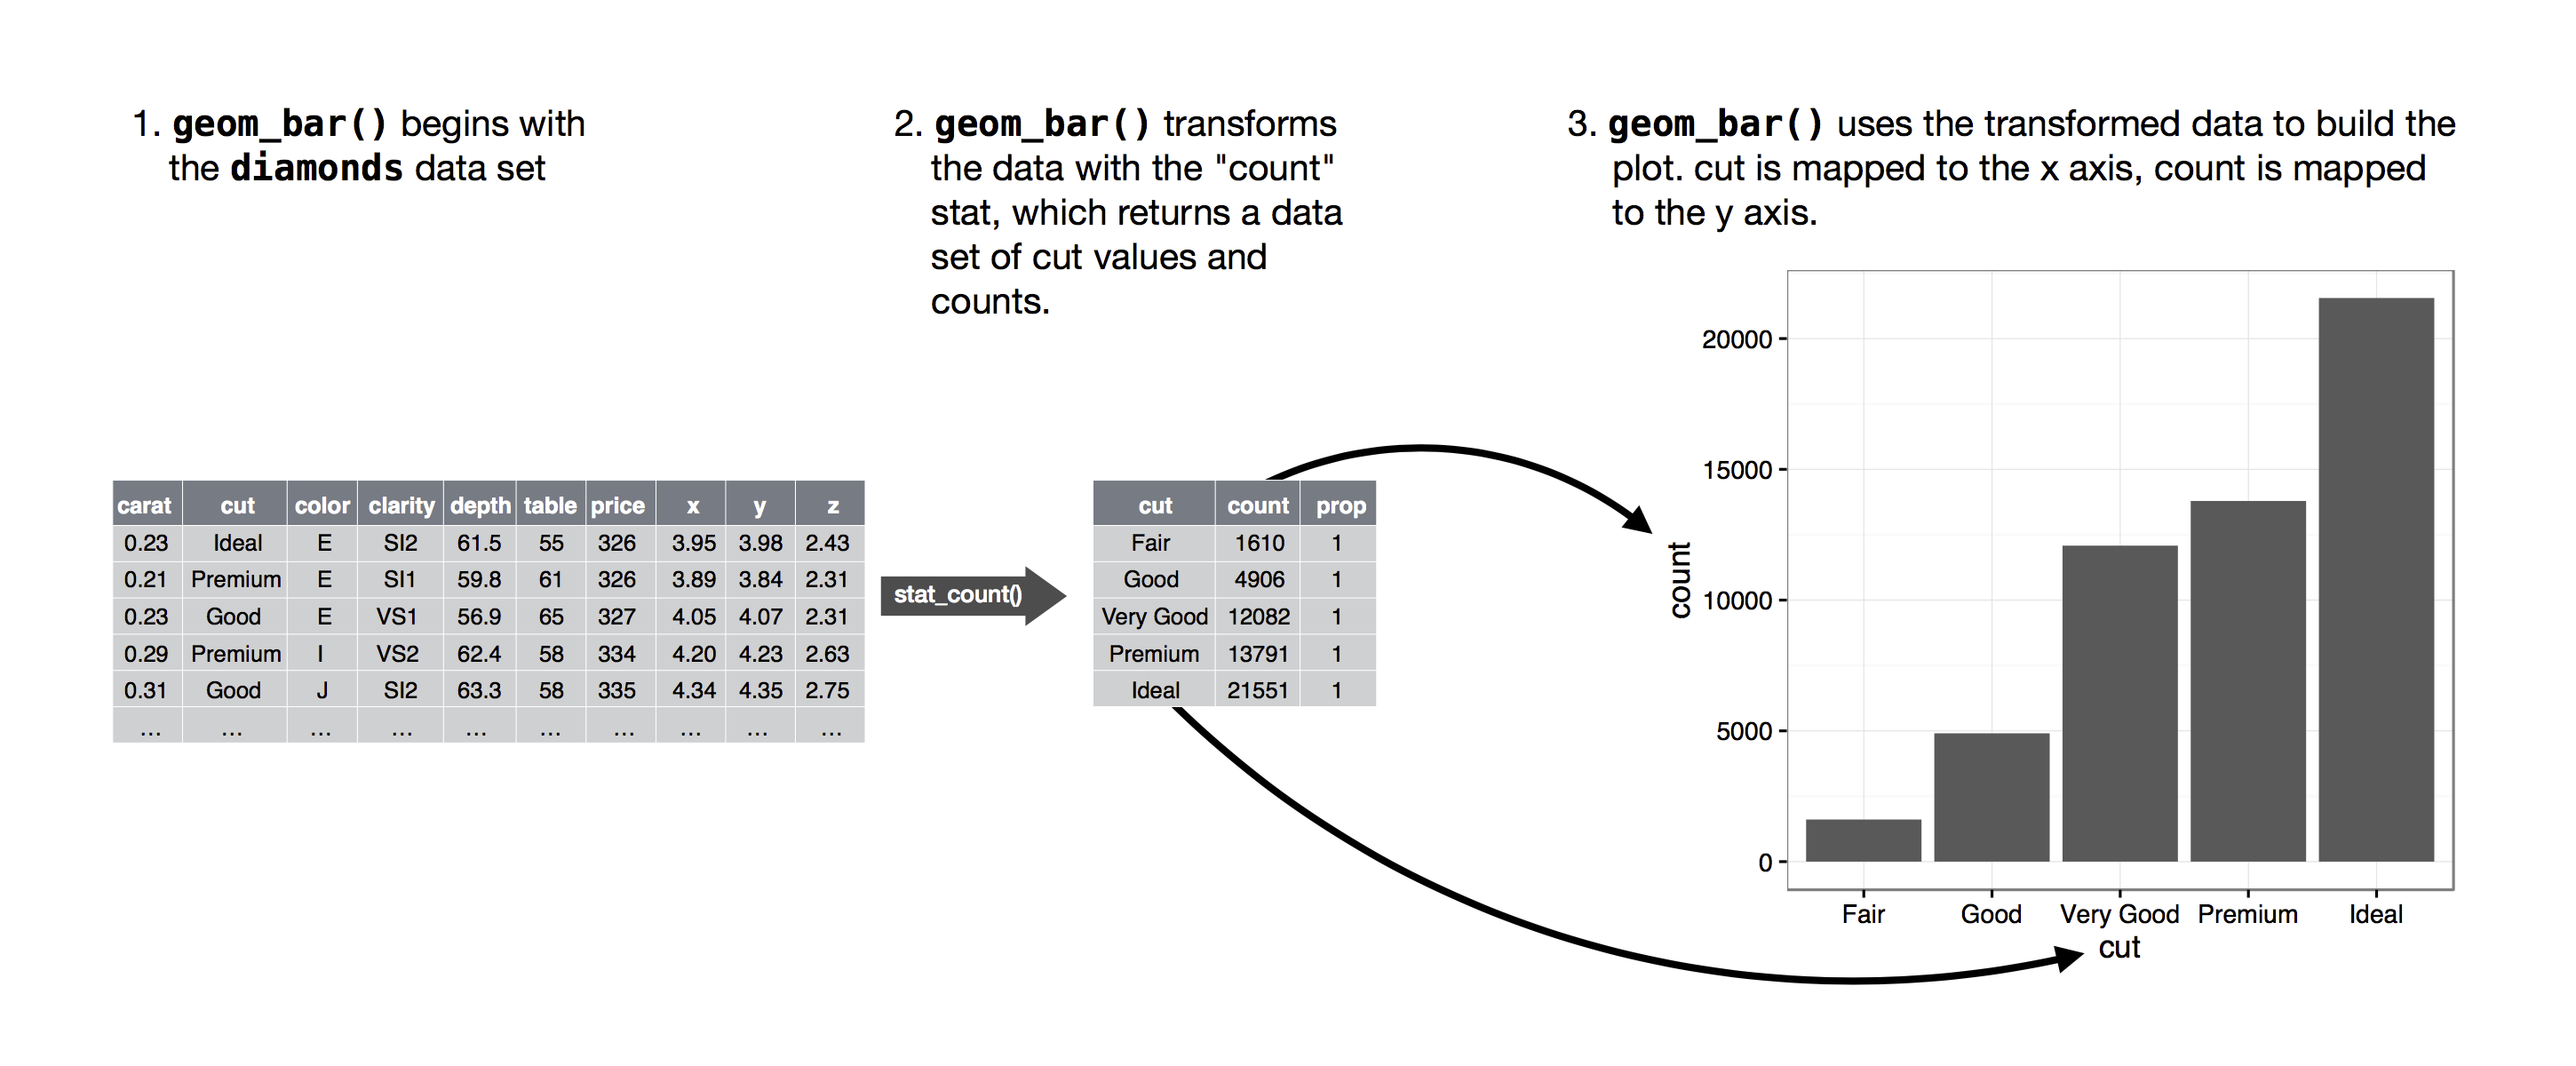

You can learn which stat a geom uses by inspecting the default value for the stat argument. For example, ?geom_bar shows that the default value for stat is “count”, which means that `geom_bar()` uses `stat_count()`. `stat_count()` is documented on the same page as geom_bar(), and if you scroll down you can find a section called “Computed variables”. That describes how it computes two new variables: count and prop.

You can generally use geoms and stats interchangeably. For example, you can recreate the previous plot using `stat_count()` instead of `geom_bar()`

In [ ]:
ggplot(data = diamonds, mapping = aes(x = cut)) +
  stat_count()

In [ ]:
cut_sum <-  diamonds %>%
  group_by(cut) %>%
  summarise(avg_price = mean(price, na.rm = TRUE))
cut_sum

In [ ]:
#-- calculate average price, let's add a little color
ggplot(data = diamonds) +
  geom_bar(mapping = aes(x = cut, y=price, fill=cut), stat="summary", fun="mean")

## Line Chart

In [ ]:
val <-data.frame(course=c(2008,2009, 2010, 2011),
                num=c(77,55,80,60))
head(val)

In [ ]:
#-- Notice the aes is in the ggplot this time?
ggplot(data=val, aes(x=course, y=num)) +
  geom_line()+
  geom_point()

## Violin Plot

In [ ]:
ggplot(mtcars, aes(factor(cyl), mpg)) +
  geom_violin() + 
  geom_jitter(height = 0, width = 0.1)

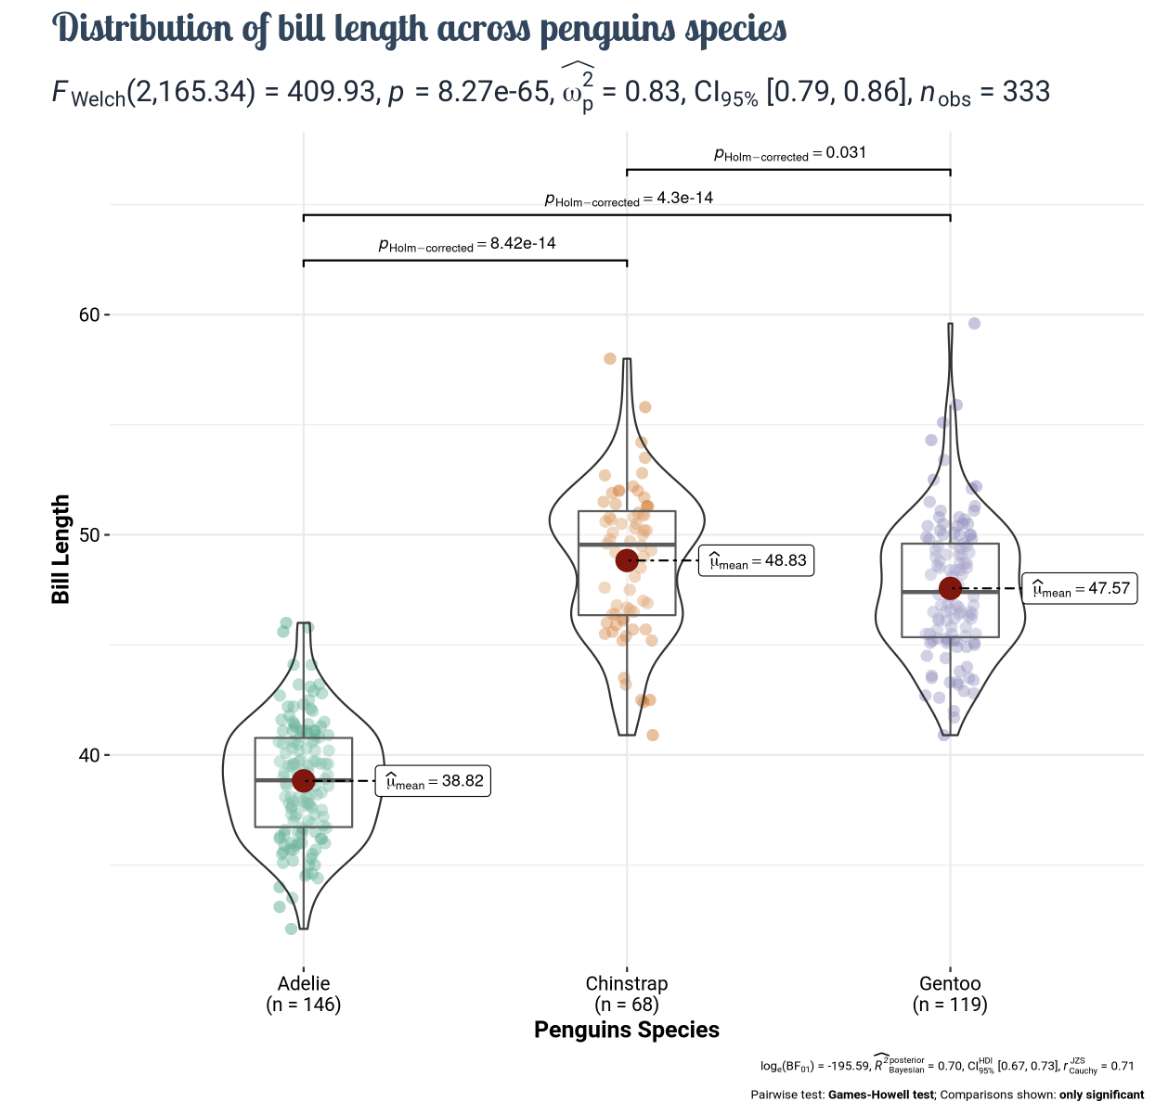